{'Mouth': array([[292, 134],
       [297, 135],
       [302, 134],
       [305, 135],
       [308, 134],
       [312, 134],
       [317, 133],
       [312, 139],
       [308, 142],
       [305, 143],
       [301, 143],
       [297, 140],
       [294, 135],
       [302, 137],
       [305, 138],
       [308, 137],
       [314, 134],
       [308, 137],
       [305, 138],
       [301, 137]]), 'Right_Eyebrow': array([[278,  99],
       [283,  97],
       [289,  98],
       [294, 100],
       [299, 103]]), 'Left_Eyebrow': array([[309, 102],
       [314,  99],
       [319,  97],
       [324,  96],
       [329,  97]]), 'Right_Eye': array([[285, 107],
       [288, 105],
       [292, 106],
       [295, 108],
       [292, 109],
       [288, 109]]), 'Left_Eye': array([[312, 108],
       [315, 105],
       [319, 104],
       [322, 106],
       [320, 108],
       [316, 108]]), 'Nose': array([[304, 107],
       [304, 114],
       [305, 120],
       [305, 126],
       [300, 128],
       [302, 129],
  

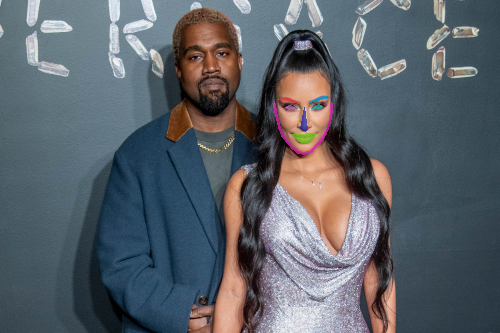

{'Mouth': array([[202,  86],
       [206,  83],
       [210,  81],
       [213,  81],
       [216,  80],
       [220,  81],
       [224,  84],
       [221,  87],
       [217,  88],
       [214,  89],
       [211,  89],
       [206,  88],
       [204,  86],
       [210,  84],
       [213,  84],
       [216,  84],
       [222,  84],
       [217,  83],
       [213,  84],
       [210,  84]]), 'Right_Eyebrow': array([[183,  55],
       [185,  49],
       [190,  45],
       [197,  45],
       [203,  46]]), 'Left_Eyebrow': array([[212,  45],
       [218,  43],
       [224,  42],
       [229,  44],
       [232,  49]]), 'Right_Eye': array([[190,  58],
       [193,  56],
       [197,  56],
       [201,  57],
       [197,  59],
       [194,  59]]), 'Left_Eye': array([[216,  55],
       [219,  53],
       [223,  52],
       [226,  54],
       [224,  55],
       [220,  56]]), 'Nose': array([[209,  53],
       [210,  58],
       [210,  63],
       [211,  68],
       [205,  74],
       [209,  74],
  

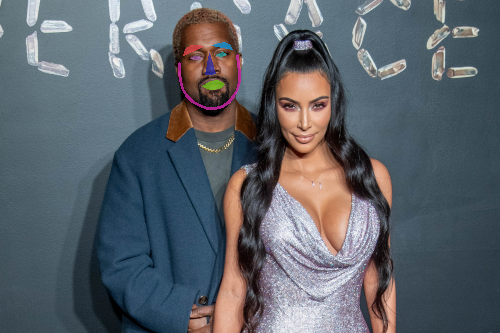

In [11]:
# import the necessary packages
from collections import OrderedDict
import numpy as np
import cv2
import argparse
import dlib
import imutils
from google.colab.patches import cv2_imshow

facial_features_cordinates = {}

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_INDEXES = OrderedDict([
    ("Mouth", (48, 68)),
    ("Right_Eyebrow", (17, 22)),
    ("Left_Eyebrow", (22, 27)),
    ("Right_Eye", (36, 42)),
    ("Left_Eye", (42, 48)),
    ("Nose", (27, 35)),
    ("Jaw", (0, 17))
])




def shape_to_numpy_array(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coordinates = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coordinates[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coordinates


def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    # create two copies of the input image -- one for the
    # overlay and one for the final output image
    overlay = image.copy()
    output = image.copy()

    # if the colors list is None, initialize it with a unique
    # color for each facial landmark region
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32),
                  (163, 38, 32), (180, 42, 220)]

    # loop over the facial landmark regions individually
    for (i, name) in enumerate(FACIAL_LANDMARKS_INDEXES.keys()):
        # grab the (x, y)-coordinates associated with the
        # face landmark
        (j, k) = FACIAL_LANDMARKS_INDEXES[name]
        pts = shape[j:k]
        facial_features_cordinates[name] = pts

        # check if are supposed to draw the jawline
        if name == "Jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull of the facial
        # landmark coordinates points and display it
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # apply the transparent overlay
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)

    # return the output image
    print(facial_features_cordinates)
    return output

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image = cv2.imread('/content/Untitled.png')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = shape_to_numpy_array(shape)

    output = visualize_facial_landmarks(image, shape)
    cv2_imshow(output)
    cv2.waitKey(0)
